# K-Nearest Neighbors: Učení od sousedů

## Cíl lekce

Po dokončení této lekce budete:
- **Rozumět principu KNN** - jak algoritmus používá "sousedy" k předpovědím
- **Umět vypočítat vzdálenost** mezi dvěma body v 2D prostoru
- **Dokázat ručně provést KNN klasifikaci** na malém datasetu
- **Chápat vliv parametru K** na výsledky klasifikace

## Motivační příklad: Je nová čtvrť bezpečná?

Představte si, že se stěhujete do nového města a hledáte bydlení. Našli jste pěkný byt, ale nevíte, jestli je čtvrť bezpečná.

**Jak byste to zjistili?**

Nejjednodušší způsob: **Zeptejte se sousedů!**

1. Najděte 3 nejbližší domy
2. Zeptejte se obyvatel: "Je tu bezpečno?"
3. Pokud 2 ze 3 řeknou "ano" → čtvrť je pravděpodobně bezpečná

**To je přesně princip K-Nearest Neighbors (KNN)!**

Algoritmus se "zeptá" nejbližších datových bodů a rozhodne podle většiny.

## Co je klasifikace?

**Klasifikace** je úloha, kdy předpovídáme **kategorii** (třídu) nového objektu.

### Příklady klasifikace z běžného života:

| Vstup | Výstup (kategorie) |
|-------|-------------------|
| Email | Spam / Ne-spam |
| Rentgenový snímek | Zdravý / Nemocný |
| Fotka zvířete | Pes / Kočka / Pták |
| Student (hodiny učení) | Projde / Neprojde |
| Zákazník | Koupí / Nekoupí |

### Supervised Learning (Učení s učitelem)

KNN patří do kategorie **supervised learning**, což znamená:
- Máme **trénovací data** s již známými odpověďmi
- Učíme se z těchto příkladů
- Pak předpovídáme kategorie pro nová data

Je to jako učit se z minulých zkušeností!

## Princip K-Nearest Neighbors (KNN)

KNN je jeden z **nejjednodušších** algoritmů strojového učení. Funguje ve 3 krocích:

### Kroky algoritmu KNN:

1. **Najdi K nejbližších bodů** k novému bodu
2. **Podívej se na jejich kategorie**
3. **Vyber nejčastější kategorii** (hlasování většinou)

### Co znamená písmeno "K"?

**K** = počet sousedů, které bereme v úvahu
- K=1: ptáme se jen 1 nejbližšího souseda
- K=3: ptáme se 3 nejbližších sousedů
- K=5: ptáme se 5 nejbližších sousedů

### Příklad hlasování pro K=5:

Máme 5 nejbližších sousedů studenta:
- Soused 1: **Prošel** ✅
- Soused 2: **Prošel** ✅
- Soused 3: **Neprošel** ❌
- Soused 4: **Prošel** ✅
- Soused 5: **Neprošel** ❌

**Hlasování:** 3× Prošel, 2× Neprošel → **Předpověď: Prošel** ✅

## Vzdálenost mezi body - intuice

### Co znamená "blízký soused"?

V reálném světě je to jednoduché - měříme vzdálenost v metrech. Ale jak měřit vzdálenost mezi **datovými body**?

### Příklad: Studenti a jejich vlastnosti

Představte si studenty jako body v 2D prostoru:
- **Osa X:** Hodiny učení (0-10 hodin)
- **Osa Y:** Hodiny spánku (0-10 hodin)

```
  Hodiny spánku
  10 |     B(8,9)
   9 |       •
   8 |   
   7 |           C(10,7)
   6 |  A(3,6)    •
   5 |    •
   4 |
   3 |
   2 |
   1 |
   0 +------------------→
     0 1 2 3 4 5 6 7 8 9 10  Hodiny učení
```

**Kdo je blíže?**
- Student A (3h učení, 6h spánku) a Student B (8h učení, 9h spánku)?
- Potřebujeme matematický způsob měření vzdálenosti!

## Euklidovská vzdálenost - vzorec

Nejběžnější způsob měření vzdálenosti je **Euklidovská vzdálenost** - přímá vzdálenost "vzdušnou čarou".

### Vzorec pro 2D prostor:

$$d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$

### Vysvětlení VŠECH symbolů:

- **$d$** = vzdálenost mezi dvěma body (distance)
- **$x_1, y_1$** = souřadnice prvního bodu (např. hodiny učení, hodiny spánku studenta 1)
- **$x_2, y_2$** = souřadnice druhého bodu (např. hodiny učení, hodiny spánku studenta 2)
- **$(x_1 - x_2)$** = rozdíl v x-ové souřadnici (rozdíl v hodinách učení)
- **$(y_1 - y_2)$** = rozdíl v y-ové souřadnici (rozdíl v hodinách spánku)
- **$()^2$** = umocnění na druhou (násobení čísla samo sebou)
- **$\sqrt{}$** = odmocnina (opak umocnění)
- **$+$** = sčítání

### Konkrétní příklad výpočtu:

Student A: (3 hodiny učení, 6 hodin spánku)
Student B: (8 hodin učení, 9 hodin spánku)

$$d = \sqrt{(3-8)^2 + (6-9)^2} = \sqrt{(-5)^2 + (-3)^2} = \sqrt{25 + 9} = \sqrt{34} = 5.83$$

Vzdálenost mezi studenty A a B je **5.83** jednotek.

## Ruční výpočet KNN - kompletní příklad

Máme **5 studentů** s jejich výsledky z minulého roku. Chceme předpovědět, zda **nový student** projde.

### Trénovací data (známé výsledky):

| Student | Hodiny učení | Hodiny spánku | Výsledek |
|---------|-------------|---------------|-----------|
| A | 2 | 8 | Neprošel ❌ |
| B | 4 | 6 | Neprošel ❌ |
| C | 6 | 7 | Prošel ✅ |
| D | 8 | 5 | Prošel ✅ |
| E | 9 | 4 | Prošel ✅ |

### Nový student:
- **Hodiny učení: 5**
- **Hodiny spánku: 6**
- **Výsledek: ???** (to chceme předpovědět)

### Krok 1: Vypočítáme vzdálenosti

Od nového studenta (5, 6) ke každému známému studentovi:

| Student | Výpočet vzdálenosti | Vzdálenost |
|---------|--------------------|-----------|
| A (2,8) | $\sqrt{(5-2)^2 + (6-8)^2} = \sqrt{9+4} = \sqrt{13}$ | **3.61** |
| B (4,6) | $\sqrt{(5-4)^2 + (6-6)^2} = \sqrt{1+0} = \sqrt{1}$ | **1.00** |
| C (6,7) | $\sqrt{(5-6)^2 + (6-7)^2} = \sqrt{1+1} = \sqrt{2}$ | **1.41** |
| D (8,5) | $\sqrt{(5-8)^2 + (6-5)^2} = \sqrt{9+1} = \sqrt{10}$ | **3.16** |
| E (9,4) | $\sqrt{(5-9)^2 + (6-4)^2} = \sqrt{16+4} = \sqrt{20}$ | **4.47** |

### Krok 2: Seřadíme podle vzdálenosti

| Pořadí | Student | Vzdálenost | Výsledek |
|--------|---------|------------|----------|
| 1. | B | 1.00 | Neprošel ❌ |
| 2. | C | 1.41 | Prošel ✅ |
| 3. | D | 3.16 | Prošel ✅ |
| 4. | A | 3.61 | Neprošel ❌ |
| 5. | E | 4.47 | Prošel ✅ |

### Krok 3: Hlasování pro K=3

Bereme **3 nejbližší sousedy**:
1. Student B: Neprošel ❌
2. Student C: Prošel ✅
3. Student D: Prošel ✅

**Výsledek hlasování:** 2× Prošel, 1× Neprošel

### Předpověď: Nový student **PROJDE** ✅

## Vliv parametru K na předpověď

Volba hodnoty K významně ovlivňuje výsledek klasifikace. Podívejme se, jak by se změnila předpověď pro různé hodnoty K:

### Předpověď pro různé hodnoty K:

| K | Nejbližší sousedé | Hlasování | Předpověď |
|---|------------------|-----------|----------|
| **K=1** | B | 1× Neprošel | **Neprošel** ❌ |
| **K=3** | B, C, D | 2× Prošel, 1× Neprošel | **Prošel** ✅ |
| **K=5** | B, C, D, A, E | 3× Prošel, 2× Neprošel | **Prošel** ✅ |

### Charakteristiky různých hodnot K:

#### K=1 (nejbližší soused)
- ✅ **Výhoda:** Velmi rychlé rozhodování
- ❌ **Nevýhoda:** Citlivé na šum a odlehlé hodnoty
- ❌ **Nevýhoda:** Může být ovlivněno jedním "netypickým" sousedem

#### K=3 nebo K=5 (malé liché K)
- ✅ **Výhoda:** Robustnější vůči šumu
- ✅ **Výhoda:** Bere v úvahu lokální strukturu dat
- ✅ **Výhoda:** Často dobrý kompromis

#### K=všechny body
- ❌ **Nevýhoda:** Ignoruje lokální strukturu
- ❌ **Nevýhoda:** Předpoví vždy nejčastější třídu v datasetu
- ❌ **Nevýhoda:** Ztrácí se princip "sousedství"

### Proč používat LICHÉ K pro binární klasifikaci?

Pro klasifikaci do 2 tříd (prošel/neprošel) používáme **liché K**, aby:
- **Nedošlo k remíze** (např. 2 hlasy vs. 2 hlasy)
- **Vždy existoval jasný vítěz** hlasování

Příklad remízy při K=4:
- 2× Prošel
- 2× Neprošel
- **Remíza!** → Museli bychom použít dodatečné pravidlo

## Import knihoven

Nyní, když rozumíme teorii KNN, můžeme importovat knihovny pro vizualizaci:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Nastavení pro hezčí grafy
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12

## Vizualizace KNN procesu

Nyní vizualizujeme celý proces KNN klasifikace s našimi 5 studenty:

C:\Users\petrrozkosny\AppData\Local\Temp\ipykernel_16520\406682822.py:66: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(studenti_uceni[idx], studenti_spanek[idx],
C:\Users\petrrozkosny\AppData\Local\Temp\ipykernel_16520\406682822.py:111: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
C:\Users\petrrozkosny\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


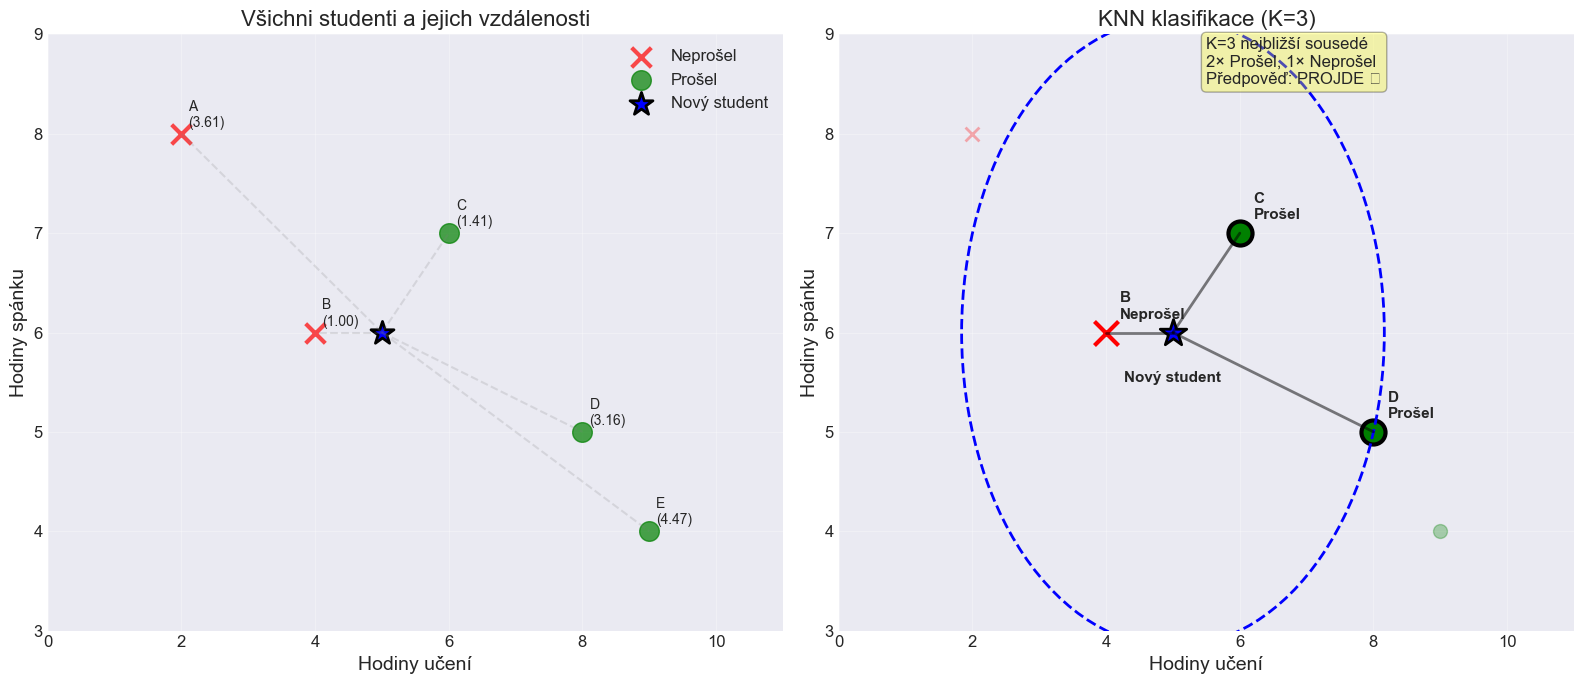

In [2]:
# Data našich 5 studentů
studenti_uceni = np.array([2, 4, 6, 8, 9])  # Hodiny učení
studenti_spanek = np.array([8, 6, 7, 5, 4])  # Hodiny spánku
studenti_vysledky = np.array([0, 0, 1, 1, 1])  # 0=Neprošel, 1=Prošel
studenti_jmena = ['A', 'B', 'C', 'D', 'E']

# Nový student
novy_uceni = 5
novy_spanek = 6

# Výpočet vzdáleností
vzdalenosti = np.sqrt((studenti_uceni - novy_uceni)**2 + (studenti_spanek - novy_spanek)**2)

# Vytvoření grafu
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# ===== LEVÝ GRAF: Všichni studenti =====
# Vykreslení studentů podle výsledku
neprosli = studenti_vysledky == 0
prosli = studenti_vysledky == 1

ax1.scatter(studenti_uceni[neprosli], studenti_spanek[neprosli], 
           c='red', s=200, marker='x', linewidth=3, label='Neprošel', alpha=0.7)
ax1.scatter(studenti_uceni[prosli], studenti_spanek[prosli], 
           c='green', s=200, marker='o', label='Prošel', alpha=0.7)

# Nový student
ax1.scatter(novy_uceni, novy_spanek, c='blue', s=300, marker='*', 
           label='Nový student', edgecolor='black', linewidth=2)

# Popisky studentů
for i, jmeno in enumerate(studenti_jmena):
    ax1.annotate(f'{jmeno}\n({vzdalenosti[i]:.2f})', 
                (studenti_uceni[i], studenti_spanek[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=10)

# Čáry spojující nového studenta s ostatními
for i in range(len(studenti_uceni)):
    ax1.plot([novy_uceni, studenti_uceni[i]], 
            [novy_spanek, studenti_spanek[i]], 
            'gray', alpha=0.2, linestyle='--')

ax1.set_xlabel('Hodiny učení', fontsize=14)
ax1.set_ylabel('Hodiny spánku', fontsize=14)
ax1.set_title('Všichni studenti a jejich vzdálenosti', fontsize=16)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 11)
ax1.set_ylim(3, 9)

# ===== PRAVÝ GRAF: K=3 nejbližší sousedé =====
# Najdeme indexy 3 nejbližších sousedů
k = 3
nejblizsi_indexy = np.argsort(vzdalenosti)[:k]

# Vykreslení všech studentů (světleji)
ax2.scatter(studenti_uceni[neprosli], studenti_spanek[neprosli], 
           c='red', s=100, marker='x', linewidth=2, alpha=0.3)
ax2.scatter(studenti_uceni[prosli], studenti_spanek[prosli], 
           c='green', s=100, marker='o', alpha=0.3)

# Zvýraznění K nejbližších sousedů
for idx in nejblizsi_indexy:
    barva = 'green' if studenti_vysledky[idx] == 1 else 'red'
    marker = 'o' if studenti_vysledky[idx] == 1 else 'x'
    ax2.scatter(studenti_uceni[idx], studenti_spanek[idx], 
               c=barva, s=300, marker=marker, linewidth=3, 
               edgecolor='black')
    
    # Čára k novému studentovi
    ax2.plot([novy_uceni, studenti_uceni[idx]], 
            [novy_spanek, studenti_spanek[idx]], 
            'black', linewidth=2, alpha=0.5)

# Nový student
ax2.scatter(novy_uceni, novy_spanek, c='blue', s=400, marker='*', 
           edgecolor='black', linewidth=2)

# Kružnice kolem nového studenta
max_vzdalenost_k = vzdalenosti[nejblizsi_indexy[-1]]
circle = Circle((novy_uceni, novy_spanek), max_vzdalenost_k, 
               fill=False, edgecolor='blue', linewidth=2, linestyle='--')
ax2.add_patch(circle)

# Popisky pro K nejbližší
for idx in nejblizsi_indexy:
    vysledek_text = 'Prošel' if studenti_vysledky[idx] == 1 else 'Neprošel'
    ax2.annotate(f'{studenti_jmena[idx]}\n{vysledek_text}', 
                (studenti_uceni[idx], studenti_spanek[idx]),
                xytext=(10, 10), textcoords='offset points', 
                fontsize=11, fontweight='bold')

# Výsledek hlasování
hlasy_prosel = sum(studenti_vysledky[nejblizsi_indexy])
hlasy_neprosel = k - hlasy_prosel
predpoved = 'PROJDE ✅' if hlasy_prosel > hlasy_neprosel else 'NEPROJDE ❌'

ax2.text(novy_uceni, novy_spanek - 0.5, 'Nový student', 
        ha='center', fontsize=11, fontweight='bold')
ax2.text(5.5, 8.5, f'K=3 nejbližší sousedé\n{hlasy_prosel}× Prošel, {hlasy_neprosel}× Neprošel\nPředpověď: {predpoved}', 
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3),
        fontsize=12)

ax2.set_xlabel('Hodiny učení', fontsize=14)
ax2.set_ylabel('Hodiny spánku', fontsize=14)
ax2.set_title(f'KNN klasifikace (K={k})', fontsize=16)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 11)
ax2.set_ylim(3, 9)

plt.tight_layout()
plt.show()

## Vizualizace vlivu parametru K

Pojďme se podívat, jak se mění předpověď pro různé hodnoty K:

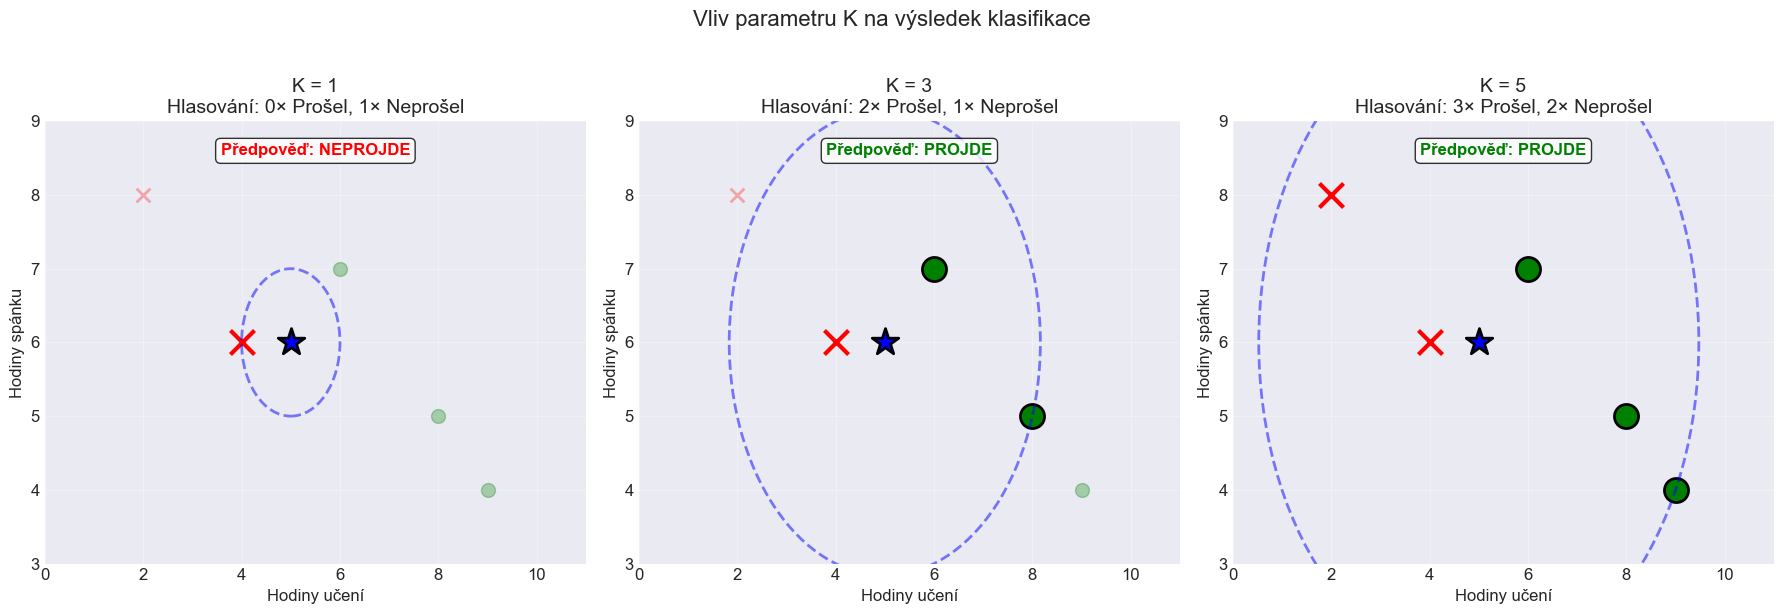

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Data našich 5 studentů
studenti_uceni = np.array([2, 4, 6, 8, 9])  # Hodiny učení
studenti_spanek = np.array([8, 6, 7, 5, 4])  # Hodiny spánku
studenti_vysledky = np.array([0, 0, 1, 1, 1])  # 0=Neprošel, 1=Prošel
studenti_jmena = ['A', 'B', 'C', 'D', 'E']

# Nový student
novy_uceni = 5
novy_spanek = 6

# Výpočet vzdáleností
vzdalenosti = np.sqrt((studenti_uceni - novy_uceni)**2 + (studenti_spanek - novy_spanek)**2)

# Indexy pro rozdělení studentů
neprosli = studenti_vysledky == 0
prosli = studenti_vysledky == 1

# Vytvoření grafu pro různé hodnoty K
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
k_hodnoty = [1, 3, 5]

for ax, k in zip(axes, k_hodnoty):
    # Najdeme K nejbližších sousedů
    nejblizsi_indexy = np.argsort(vzdalenosti)[:k]
    
    # Vykreslení všech studentů (světleji)
    ax.scatter(studenti_uceni[neprosli], studenti_spanek[neprosli], 
              c='red', s=100, marker='x', linewidth=2, alpha=0.3)
    ax.scatter(studenti_uceni[prosli], studenti_spanek[prosli], 
              c='green', s=100, marker='o', alpha=0.3)
    
    # Zvýraznění K nejbližších sousedů
    for idx in nejblizsi_indexy:
        barva = 'green' if studenti_vysledky[idx] == 1 else 'red'
        marker = 'o' if studenti_vysledky[idx] == 1 else 'x'
        
        # Rozdílné vykreslení podle typu markeru
        if marker == 'o':
            # Kruh má výplň, můžeme použít edgecolor
            ax.scatter(studenti_uceni[idx], studenti_spanek[idx], 
                      c=barva, s=300, marker=marker,
                      edgecolor='black', linewidth=2)
        else:
            # Křížek nemá výplň, pouze nastavíme barvu a tloušťku
            ax.scatter(studenti_uceni[idx], studenti_spanek[idx], 
                      c=barva, s=300, marker=marker, linewidth=3)
    
    # Nový student
    ax.scatter(novy_uceni, novy_spanek, c='blue', s=400, marker='*', 
              edgecolor='black', linewidth=2)
    
    # Kružnice
    max_vzdalenost_k = vzdalenosti[nejblizsi_indexy[-1]]
    circle = Circle((novy_uceni, novy_spanek), max_vzdalenost_k, 
                   fill=False, edgecolor='blue', linewidth=2, linestyle='--', alpha=0.5)
    ax.add_patch(circle)
    
    # Výsledek hlasování
    hlasy_prosel = sum(studenti_vysledky[nejblizsi_indexy])
    hlasy_neprosel = k - hlasy_prosel
    
    # Použijeme text místo emoji
    predpoved = 'PROJDE' if hlasy_prosel > hlasy_neprosel else 'NEPROJDE'
    barva_predpovedi = 'green' if hlasy_prosel > hlasy_neprosel else 'red'
    
    # Popisky
    ax.set_title(f'K = {k}\nHlasování: {hlasy_prosel}× Prošel, {hlasy_neprosel}× Neprošel', 
                fontsize=14)
    
    # Přidáme předpověď jako zvýrazněný text
    ax.text(0.5, 0.95, f'Předpověď: {predpoved}', 
            transform=ax.transAxes,
            fontsize=12, fontweight='bold',
            color=barva_predpovedi,
            ha='center', va='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Hodiny učení', fontsize=12)
    ax.set_ylabel('Hodiny spánku', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 11)
    ax.set_ylim(3, 9)

plt.suptitle('Vliv parametru K na výsledek klasifikace', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Shrnutí

### Co jsme se naučili:

1. **KNN princip** - algoritmus se "ptá" K nejbližších sousedů a rozhoduje podle většiny

2. **Vzdálenost je klíčová** - používáme Euklidovskou vzdálenost pro měření "blízkosti" bodů

3. **Proces KNN klasifikace:**
   - Vypočítat vzdálenosti ke všem známým bodům
   - Vybrat K nejbližších
   - Hlasovat podle jejich kategorií
   - Předpovědět nejčastější kategorii

4. **Volba K ovlivňuje výsledek:**
   - Malé K (např. 1) = citlivé na šum
   - Střední K (např. 3-7) = dobrý kompromis
   - Velké K = může ignorovat lokální strukturu

### Výhody KNN:
- ✅ Velmi jednoduchý a intuitivní
- ✅ Žádné "trénování" - jen si pamatuje data
- ✅ Funguje dobře pro nelineární hranice

### Nevýhody KNN:
- ❌ Pomalý pro velké datasety
- ❌ Citlivý na škálování dat (příště se naučíme, jak to řešit)
- ❌ Špatně funguje ve vysokých dimenzích

